# Lead Scoring Assignment 

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step1: Importing Data Set

In [1]:
import os
os.getcwd()


'/Users/vamanyadav/Downloads'

In [2]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing numpy and pandas
import numpy as np, pandas as pd


pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.width', 1000)

In [4]:
# Importing Dataset
Leads_data=pd.read_csv("Leads.csv")
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe and EDA

In [5]:
# Lets check the shape of our dataset
Leads_data.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
Leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking for missing values
100*Leads_data.isnull().mean().sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [9]:
# Dealing with missing_values, deleting features with missing values % greater than 35
mv=Leads_data.isnull().mean().reset_index()
mv[0]=mv[0]*100
mv=mv.rename(columns={'index':'Column Name',0: '% of Nulls'})
mv=mv.sort_values(by='% of Nulls', ascending=False)
drop_cols=list(mv[mv['% of Nulls']>35]["Column Name"])
Leads=Leads_data.drop(drop_cols,axis=1)

In [10]:
Leads.shape

(9240, 31)

In [11]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [12]:
# Continous Columns
cont_cols=Leads.select_dtypes(include=['float64','int64']).columns

In [13]:
Leads[cont_cols]

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,0,0.0,0,0.00
1,660728,0,5.0,674,2.50
2,660727,1,2.0,1532,2.00
3,660719,0,1.0,305,1.00
4,660681,1,2.0,1428,1.00
...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67
9236,579546,0,2.0,238,2.00
9237,579545,0,2.0,199,2.00
9238,579538,1,3.0,499,3.00


In [14]:
100*Leads.isnull().mean().sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [15]:
cols=Leads.columns

In [16]:
for i in cols:
    l=[]
    l=Leads[i].value_counts()
    print(l)
    print('---------------------------------------------')
    

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
---------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------------------------------

In [17]:
# Dropping Columns City and Country as we wont be able to interpret anything in our analysis

Leads.drop(columns=['City', 'Country'], axis=1, inplace=True)

In [18]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified


In [19]:
100*Leads.isnull().mean().sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
X Education Forums                                0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.0000

In [20]:
cols=Leads.columns

In [21]:
for i in cols:
    l=[]
    l=Leads[i].value_counts()
    print(l)
    print('---------------------------------------------')
    

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
---------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------------------------------

##### In the columns Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque only one value is dominating better to drop them as they are of no use in our anlysis



In [22]:
drop_cols=['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
Leads.drop(drop_cols, axis=1, inplace=True)

In [23]:
100*Leads.isnull().mean().sort_values(ascending=False)

Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
A free copy of Mastering The Interview            0.000000
Prospect ID                                       0.000000
Lead Number                                       0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Email                                      0.000000
Lead Origin                                       0.000000
Last Notable Activity                             0.0000

In [24]:
cols=Leads.columns

In [25]:
for i in cols:
    l=[]
    l=Leads[i].value_counts()
    print(l)
    print('---------------------------------------------')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
---------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------------------------------

In [26]:
# In columns   What matters most to you in choosing a course 'Better Career Prospects' is dominating
# Dropping the columns in above case

Leads.drop(columns=['What matters most to you in choosing a course'],axis=1, inplace=True)

In [27]:
# Lead Profile and How did you hear about X Education has lot of rows with value "select" which is of no use and is same as missing

Leads.drop(columns=['Lead Profile','How did you hear about X Education'], axis=1, inplace=True)

In [28]:
Leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [29]:
# Dropping the rows with nulls in column What is your current occupation
Leads=Leads[Leads["What is your current occupation"].isnull()==False]

In [30]:
Leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [31]:
# Dropping the rows with nulls in column Total Visits
Leads=Leads[Leads["TotalVisits"].isnull()==False]

In [32]:
Leads.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [33]:
# Dropping the rows with nulls in column Lead Source
Leads=Leads[Leads["Lead Source"].isnull()==False]

In [34]:
Leads.isnull().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [35]:
# Dropping the rows with nulls in column Specialization
Leads=Leads[Leads["Specialization"].isnull()==False]

In [36]:
Leads.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [37]:
print(len(Leads.index))
print(len(Leads.index)/9240)

6373
0.6897186147186147


### Step 3: Data Preparation 

In [38]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [39]:
Leads["Do Not Email"].value_counts()

No     5938
Yes     435
Name: Do Not Email, dtype: int64

In [40]:
Leads["A free copy of Mastering The Interview"].value_counts()

No     4202
Yes    2171
Name: A free copy of Mastering The Interview, dtype: int64

#####  Converting some binary variables (Yes/No) to 0/1 

In [41]:
varlist=['Do Not Email','A free copy of Mastering The Interview']

# Defining a map function

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})


Leads[varlist]=Leads[varlist].apply(binary_map)


In [42]:
Leads["Do Not Email"].value_counts()

0    5938
1     435
Name: Do Not Email, dtype: int64

In [43]:
Leads["A free copy of Mastering The Interview"].value_counts()

0    4202
1    2171
Name: A free copy of Mastering The Interview, dtype: int64

In [44]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 
                              'Last Activity',
                              'What is your current occupation',
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
Leads = pd.concat([Leads, dummy], axis=1)

In [45]:
# Creating dummy variable separately for the variable 
# 'Specialization' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(Leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
Leads = pd.concat([Leads, dummy_spl], axis = 1)

In [46]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# Drop the variables for which the dummy variables have been created

Leads = Leads.drop(['Lead Origin', 'Lead Source',  'Last Activity',
                   'Specialization', 'What is your current occupation',
                    'Last Notable Activity'], axis=1)

In [48]:
Leads.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Step 4 : Test - Train Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Creating feature Variable X

X=Leads.drop(columns=['Prospect ID','Lead Number', 'Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
y= Leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [52]:
# Splitting the data into Train and Test

X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling 

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
Scaler=MinMaxScaler()

In [55]:
X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]=Scaler.fit_transform(X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

In [56]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.068370,0.014528,0.234426,0.153604,0.337368,0.564672,0.094149,0.003587,0.290069,0.003587,0.320108,0.000448,0.139206,0.140776,0.000224,0.000224,0.071733,0.011208,0.0,0.000224,0.021296,0.000448,0.000224,0.048644,0.027348,0.030038,0.0,0.387357,0.000224,0.012553,0.003811,0.062542,0.069491,0.338937,0.010536,0.006725,0.000897,0.000224,0.001793,0.002690,0.028917,0.862139,0.103340,0.007397,0.019727,0.0,0.322349,0.0,0.002242,0.305089,0.011432,0.033849,0.288725,0.003587,0.005380,0.000224,0.040574,0.052230,0.007846,0.013226,0.116342,0.019727,0.012553,0.106254,0.044385,0.023089,0.104237,0.023313,0.058507,0.014571,0.008742,0.002690,0.040126,0.022192
std,0.252409,0.021712,0.248618,0.127910,0

In [57]:
# Checking Conversion rate

Converted=round(sum(Leads["Converted"])/len(Leads['Converted'].index)*100,2)
Converted

48.09

We have 48.09% conversion rate

### Step 6: Checking Correlations

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

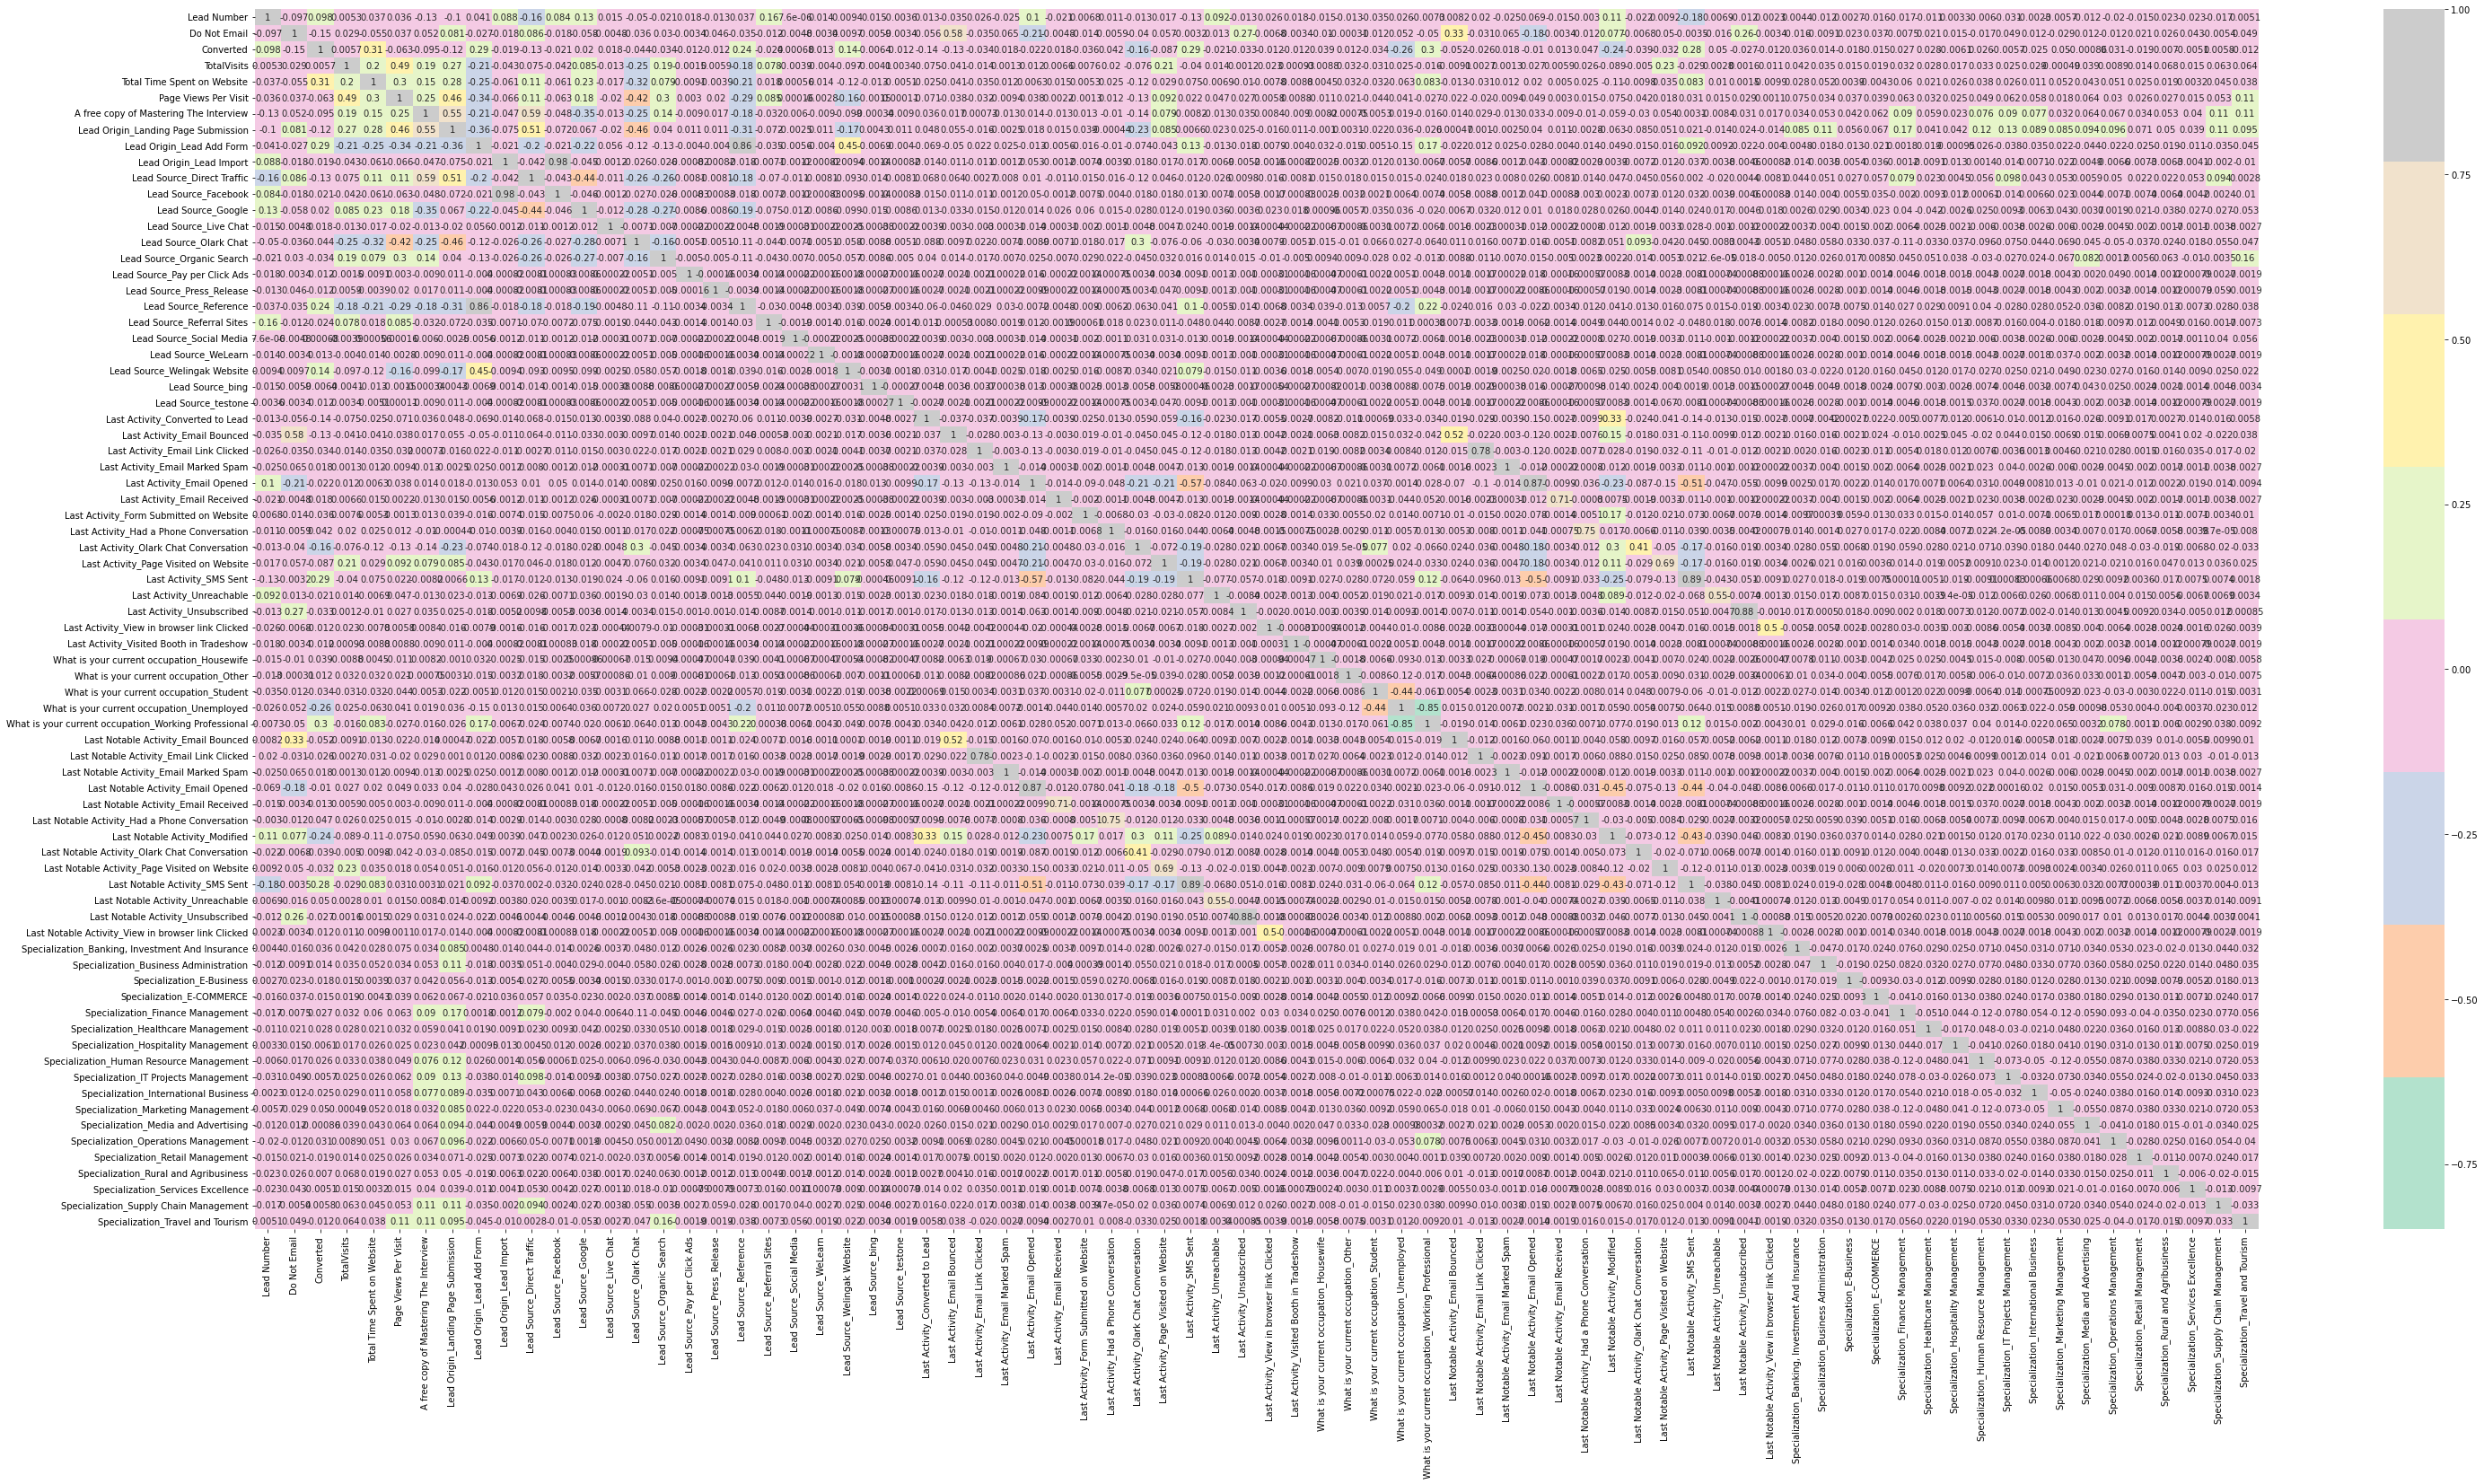

In [59]:
# Correlation matrix

plt.figure(figsize=(50,25))
sns.heatmap(Leads.corr(), annot=True, cmap='Pastel2')
plt.show()


In [60]:
pd.set_option('display.max_rows', 300)
Leads.corr()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,1.000000,-0.097222,0.097784,0.005260,0.037461,0.035617,-0.126917,-0.103419,0.041061,0.087775,-0.157491,0.084264,0.131586,0.015363,-0.050162,-0.020603,0.018070,-0.012720,0.037084,0.161732,0.000008,0.014484,0.009385,0.014655,-0.003567,0.012933,-0.035386,0.026193,-0.024636,0.100856,-0.020506,0.006850,0.011066,-0.012822,0.017425,-0.129610,0.092271,-0.012811,0.026068,0.018329,-0.015251,-0.012823,-0.035259,0.025882,-0.007283,0.008156,0.019780,-0.024636,0.069149,-0.014700,-0.003002,0.106680,-0.021985,0.009180,-0.182231,0.006870,-0.012453,0.002324,0.004438,-0.012376,0.002734,-0.016481,-0.017383,-0.010514,0.003287,-0.005988,-0.030925,-0.002303,-0.005652,-0.011850,-0.019829,-0.014765,0.022990,-0.023225,-0.016734,0.005143
Do Not Email,-0.097222,1.000000,-0.148451,0.028900,-0.054778,0.036723,0.052271,0.081123,-0.027360,-0.017655,0.086261,-0.017980,-0.058344,-0.004796,-0.035661,0.030114,-0.003391,0.046285,-0.034833,-0.012227,-0.004796,-0.003391,0.009698,-0.005874,-0.003391,-0.056334,0.578942,-0.034551,0.065462,-0.207856,-0.004796,-0.014046,-0.005913,-0.040306,0.056875,-0.003163,0.012768,0.269995,-0.006783,-0.003391,-0.010178,-0.000306,-0.011523,0.052291,-0.050486,0.325220,-0.031092,0.065462,-0.180244,-0.003391,-0.012237,0.077136,-0.006807,0.050062,-0.003515,-0.015930,0.258311,-0.003391,-0.016042,-0.009139,0.023295,0.036547,-0.007458,0.021217,0.015065,-0.017078,0.048816,0.011698,-0.029050,0.011938,-0.012156,0.020802,0.026478,0.042738,-0.005422,0.048711
Converted,0.097784,-0.148451,1.000000,0.005651,0.313338,-0.063362,-0.

### Step 7: Model Building

###### Running first training model

In [61]:
import statsmodels.api as sm

In [62]:
X_train_sm=sm.add_constant(X_train)

In [63]:
logm1=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4392
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 01 Jan 2023   Deviance:                   1.1964e+05
Time:                        23:01:37   Pearson chi2:                 5.85e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -3.699e+15   8.84e+07  -4.18e+07      0.000    -3.7e+15    -3.7e+15
Do Not Email                                          9.839e+12   5.42e+06   1.81e+06      0.000    9.84e+12    9.84e+12
TotalVisits                                           5.344e+15    5.4e+07    9.9e+07      0.000    5.34e+15    5.34e+15
Total Time Spent on Website                           3.047e+15   4.67e+06   6.53e+08      0.000    3.05e+15    3.05e+15
Page Views Per Visit                                 -9.889e+14   1.16e+07  -8.56e+07      0.000   -9.89e+14   -9.89e+14
A free copy of Mastering The Interview               -1.823e+14   3.09e+06   -5.9e+07      0.000   -1.82e+14   -1.82e+14
Lead Origin_Landing Page Submission                   1.338e+14   3.81e+06   3.51e+07      0.000    1.34e+14    1.34e+14
Lead Origin_Lead Add Form                             3.731e+15   4.77e+07   7.83e+07      0.000    3.73e+15    3.73e+15
Lead Origin_Lead Import                               3.819e+15   4.21e+07   9.08e+07      0.000    3.82e+15    3.82e+15
Lead Source_Direct Traffic                            7.072e+15   8.26e+07   8.57e+07      0.000    7.07e+15    7.07e+15
Lead Source_Facebook                                  3.819e+15   4.21e+07   9.08e+07      0.000    3.82e+15    3.82e+15
Lead Source_Google                                    7.345e+15   8.25e+07    8.9e+07      0.000    7.35e+15    7.35e+15
Lead Source_Live Chat                                  1.06e+16   8.24e+07   1.29e+08      0.000    1.06e+16    1.06e+16
Lead Source_Olark Chat                                7.986e+15   8.25e+07   9.68e+07      0.000    7.99e+15    7.99e+15
Lead Source_Organic Search                            7.287e+15   8.26e+07   8.82e+07      0.000    7.29e+15    7.29e+15
Lead Source_Pay per Click Ads                         3.241e+15   1.06e+08   3.04e+07      0.000    3.24e+15    3.24e+15
Lead Source_Press_Release                             3.615e+15   1.07e+08   3.38e+07      0.000    3.62e+15    3.62e+15
Lead Source_Reference                                 5.253e+15   6.74e+07   7.79e+07      0.000    5.25e+15    5.25e+15
Lead Source_Referral Sites                            7.281e+15   8.31e+07   8.76e+07      0.000    7.28e+15    7.28e+15
Lead Source_Social Media                              -137.2286   2.07e-06  -6.64e+07      0.000    -137.229    -137.229
Lead Source_WeLearn                                   1.064e+16   1.06e+08      1e+08      0.000    1.06e+16    1.06e+16
Lead Source_Welingak Website                           5.51e+15   6.77e+07   8.14e+07      0.000    5.51e+15    5.51e+15
Lead Source_bing                                       3.6

### Step 8: Feature Selection using RFE

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [65]:
logreg=LogisticRegression()

In [66]:
rfe=RFE(estimator=logreg, n_features_to_select=15)

In [67]:
rfe=rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('A free copy of Mastering The Interview', False, 50),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 52),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Emai

In [69]:
col=X_train.columns[rfe.support_]

In [70]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent', 'What is your current occupation_Housewife', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Unreachable'], dtype='object')

In [71]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_testone', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'Last Activity_View in browser link Clicked', 'Last Activity_Visited Booth in Tradeshow', 'What is your current occupation_Other',
       'Last Notable Activity_

In [72]:
X_train_sm=sm.add_constant(X_train[col])

In [73]:
logm2=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

In [74]:
res=logm2.fit()

In [75]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Sun, 01 Jan 2023   Deviance:                       4145.5
Time:                        23:01:39   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
Do Not Email                                            -1.5053      0.193     -7.781      0.000      -1.884      -1.126
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

#### Checking VIF

As we see many features with p-value> 0.05, we need to check VIF to the features that qualifies to be dropped

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif=pd.DataFrame()

In [78]:
vif["Features"]=X_train[col].columns

In [79]:
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,84.19
5,Lead Source_Reference,65.18
6,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
2,Total Time Spent on Website,2.38
1,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


In [80]:
# Column Lead Source_Reference has high VIF and p-value lets drop it
col=col.drop("Lead Source_Reference", 1)

In [81]:
X_train_sm=sm.add_constant(X_train[col])

In [82]:
logm3=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

In [83]:
res1=logm3.fit()

In [84]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Sun, 01 Jan 2023   Deviance:                       4146.5
Time:                        23:01:39   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
Do Not Email                                            -1.5036      0.193     -7.779      0.000      -1.882      -1.125
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [85]:
# Checking vif again

vif=pd.DataFrame()
vif["Features"]=X_train[col].columns
vif["VIF"]=[variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif

,Features,VIF
0,Do Not Email,1.09
1,TotalVisits,1.62
2,Total Time Spent on Website,2.38
3,Lead Origin_Lead Add Form,1.71
4,Lead Source_Olark Chat,1.44
5,Lead Source_Welingak Website,1.33
6,Last Activity_Had a Phone Conversation,2.44
7,Last Activity_SMS Sent,1.59
8,What is your current occupation_Housewife,1.01
9,What is your current occupation_Student,1.09


We find VIFs are in limit, feature elimination to be done based on p-value

In [86]:
# Dropping columns with high p-values
# Last Notable Activity_Had a Phone Conversation has highest p-value

col=col.drop("Last Notable Activity_Had a Phone Conversation", 1)

In [87]:
X_train_sm=sm.add_constant(X_train[col])

In [88]:
logm4=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

In [89]:
res4=logm4.fit()

In [90]:
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Sun, 01 Jan 2023   Deviance:                       4152.2
Time:                        23:01:39   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
Do Not Email                                            -1.5037      0.193     -7.780      0.000      -1.882      -1.125
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [91]:
# Dropping What is your current occupation_Housewife

col=col.drop("What is your current occupation_Housewife", 1)

In [92]:
X_train_sm=sm.add_constant(X_train[col])

In [93]:
logm5=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

In [94]:
res5=logm5.fit()

In [95]:
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Sun, 01 Jan 2023   Deviance:                       4156.7
Time:                        23:01:40   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
Do Not Email                                            -1.5063      0.193     -7.785      0.000      -1.886      -1.127
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [96]:
# Dropping the column What is your current occupation_Working Professional
col=col.drop("What is your current occupation_Working Professional", 1)

In [97]:
X_train_sm=sm.add_constant(X_train[col])

In [98]:
logm6=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

In [99]:
res6=logm6.fit()

In [100]:
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Sun, 01 Jan 2023   Deviance:                       4158.1
Time:                        23:01:40   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
Do Not Email                                  -1.5037      0.193     -7.774      0.000      -1.883      -1.125
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

p-values are in appropriate range, lets check for VIF again

In [101]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif["VIF"]=[variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif

,Features,VIF
0,Do Not Email,1.08
1,TotalVisits,1.54
2,Total Time Spent on Website,2.00
3,Lead Origin_Lead Add Form,1.45
4,Lead Source_Olark Chat,1.33
5,Lead Source_Welingak Website,1.30
6,Last Activity_Had a Phone Conversation,1.01
7,Last Activity_SMS Sent,1.51
8,What is your current occupation_Student,1.06
9,What is your current occupation_Unemployed,2.82


### Step 9: Model Evaluation

In [102]:
# Using predict for prediction of probabilities based on model created

y_train_pred=res6.predict(X_train_sm)
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [103]:
y_train_pred=y_train_pred.values.reshape(-1)

In [104]:
y_train_pred

array([0.30011695, 0.14200165, 0.12762885, ..., 0.90928046, 0.20824893,
       0.37018595])

##### Creating a dataset with Actual Converted values and probability 

In [105]:
y_train_pred_final=pd.DataFrame({"Converted": y_train.values, "Convert_Prob": y_train_pred})

In [106]:
y_train_pred_final["ID"]=y_train.index

In [107]:
y_train_pred_final.head()

,Converted,Convert_Prob,ID
0,0,0.300117,8003
1,0,0.142002,218
2,1,0.127629,4171
3,1,0.291558,4037
4,1,0.954795,3660


#### Lets consider a arbitary cutoff value of 0.5 intially 

In [108]:
y_train_pred_final["Predicted"]=y_train_pred_final.Convert_Prob.map(lambda x: 1 if x>0.5 else 0)

In [109]:
y_train_pred_final.head()

,Converted,Convert_Prob,ID,Predicted
0,0,0.300117,8003,0
1,0,0.142002,218,0
2,1,0.127629,4171,0
3,1,0.291558,4037,0
4,1,0.954795,3660,1


#### Confusion Matrix

In [110]:
from sklearn import metrics

In [111]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[1929  383]
 [ 560 1589]]


#### Accuracy 

In [112]:
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(round(accuracy*100,2))

78.86


#### Metrics beyond Simple Accuracy 

In [113]:
# Actual/Predicted   NotConverted  Converted
# Not Converted      1929           383
# Converted          560            1589

In [114]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [115]:
# Sensitivity= Correctly Predicted Positive/ Actual Postive

print(TP*100/ float(TP + FN))

73.9413680781759


In [116]:
# Specificity = Correctly Predicted Negative/Actual Negative

print(TN*100/ float(TN + FP))

83.43425605536332


In [117]:
# False Positvie Rate= Wrongly precicted as positive/Actual Negative

print(FP*100/float(TN + FP))

16.56574394463668


In [118]:
# Positive Predicted Value

print(TP*100/float(TP + FP))

80.57809330628804


In [119]:
# Negative Predicted Value

print(TN*100/float(TN + FN))

77.50100441944556


### Step 10: Plotting the ROC Curve

Using ROC Curve we need to find the Area under the curve, closer the curve to left hand border and top border, accurate the test is.

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds=metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate=False)

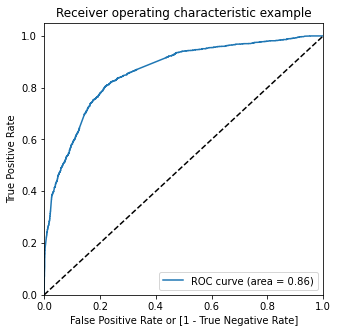

In [122]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

##### Area under curve is 0.86 which looks good

### Finding the Optimal Cutoff

We have taken the cutoff as 0.5 which is an arbitary value, we need to find the optimal cutoff value for our model

In [123]:
numbers=[float(x/10) for x in range(10)]

In [124]:
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
    
    
y_train_pred_final.head()

,Converted,Convert_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,8003,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,218,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,4171,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,4037,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,3660,1,1,1,1,1,1,1,1,1,1,1


In [125]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df=pd.DataFrame(columns=["Probability", "Accuracy", "Sensitivity", "Specificity"])
num=[float(x/10) for x in range(10)]

for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    TP=cm1[1,1]
    TN=cm1[0,0]
    FP=cm1[0,1]
    FN=cm1[1,0]
    
    Total=sum(sum(cm1))
    Accuracy=(TP + TN)/ Total
    Sensitivity= TP/(TP + FN)
    Specificity= TN/(TN + FP)
    
    cutoff_df.loc[i]=[i, Accuracy, Sensitivity, Specificity]
    
print(cutoff_df)    

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.481731     1.000000     0.000000
0.1          0.1  0.527012     0.994416     0.092561
0.2          0.2  0.698274     0.944160     0.469723
0.3          0.3  0.767541     0.865984     0.676038
0.4          0.4  0.791975     0.810610     0.774654
0.5          0.5  0.788612     0.739414     0.834343
0.6          0.6  0.757229     0.624011     0.881055
0.7          0.7  0.735037     0.543509     0.913062
0.8          0.8  0.711500     0.453234     0.951557
0.9          0.9  0.644026     0.279665     0.982699


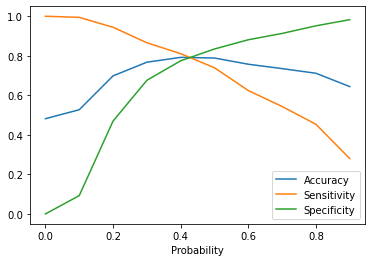

In [126]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])

plt.show()

From the above plot Threshold around 0.42 seems optimal 

In [127]:
# Lets create final prediction based on optimal threshold value

y_train_pred_final["Final_Predicted"]=y_train_pred_final.Convert_Prob.map(lambda x: 1 if x>0.42 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.300117,8003,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,218,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,4171,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,4037,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,3660,1,1,1,1,1,1,1,1,1,1,1,1


In [128]:
# lets check the accuracy 

accuracy_final=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

print(round(accuracy_final,2)*100)

79.0


In [129]:
# Final Confusion Matrix

confusion_final=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

print(confusion_final)

[[1823  489]
 [ 444 1705]]


In [130]:
# Actual/Predict  Not Converted   Converted

#  Not Converted    1823            489
#  Converted         444           1705

In [131]:
TP=confusion_final[1,1]
TN=confusion_final[0,0]
FP=confusion_final[0,1]
FN=confusion_final[1,0]

In [132]:
# Sensitivity

print(TP*100 / float(TP + FN))

79.33922754769661


In [133]:
# Specificity

print(TN*100 / float(TN + FP))

78.84948096885813


In [134]:
# False Positive Rate

print(FP*100/ float(TN + FP))

21.15051903114187


In [135]:
# Positive Predictive Value

print(TP*100 /(TP + FP))

77.71194165907019


In [136]:
# Negative Predictive Value

print(TN*100/ (TN + FN))

80.41464490516101


### Precision and Recall

In [137]:
# Precision
# TP/ (TP + FP)

print(confusion[1,1]/(confusion[1,1] + confusion[0,1]))

0.8057809330628803


In [138]:
# Recall
# TP/TP + FN

print(confusion[1,1]/(confusion[1,1] + confusion[1,0]))

0.739413680781759


### Precision and Recall Tradeoff using sklearn 

In [139]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [140]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8057809330628803

In [141]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.739413680781759

In [142]:
from sklearn.metrics import precision_recall_curve

In [143]:
p, r, threshold = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

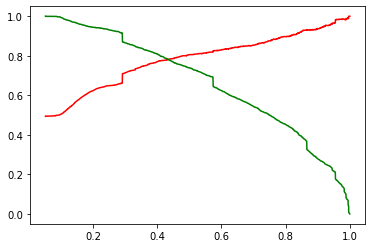

In [172]:
# Plotting
plt.plot(threshold, p[:-1], 'r-')
plt.plot(threshold, r[:-1], 'g-')
plt.show()

The above graph shows that our threshold chosen as 0.42 was accurate 

### Step 11: Making Predictions on Test set 

In [145]:
# Feature Scaling on Test set

X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]=Scaler.transform(X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

In [146]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0,0.000000,0.000000,1,0,0,0,1,0,0,0
6122,0,0.027888,0.029049,0,0,0,0,0,0,1,0
9202,0,0.015936,0.416813,0,0,0,0,1,0,1,0
6570,1,0.011952,0.378961,0,0,0,0,1,0,1,0
2668,0,0.031873,0.395246,0,0,0,0,1,0,1,0


In [147]:
X_test_sm=sm.add_constant(X_test)

In [148]:
y_test_pred=res6.predict(X_test_sm)

In [149]:
y_test_pred

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
          ...   
5828    0.288867
6583    0.413842
5531    0.799951
3056    0.336688
4088    0.556538
Length: 1912, dtype: float64

In [150]:
type(y_test_pred)

pandas.core.series.Series

In [151]:
# Converting y_test_pred into datafarme

y_pred_1=pd.DataFrame(y_test_pred)

In [152]:
y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [153]:
y_test

4771    1
6122    0
9202    0
6570    1
2668    1
       ..
5828    0
6583    1
5531    0
3056    1
4088    1
Name: Converted, Length: 1912, dtype: int64

In [154]:
# Creating Dataframe of y_test

y_test_df=pd.DataFrame(y_test)

In [155]:
y_test_df["ID"]=y_test_df.index

In [156]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
y_pred_1

,0
0,0.996296
1,0.129992
2,0.703937
3,0.299564
4,0.720796
...,...
1907,0.288867
1908,0.413842
1909,0.799951
1910,0.336688


In [158]:
y_test_df

,Converted,ID
0,1,4771
1,0,6122
2,0,9202
3,1,6570
4,1,2668
...,...,...
1907,0,5828
1908,1,6583
1909,0,5531
1910,1,3056


In [159]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [161]:
y_pred_final.head()

,Converted,ID,Convert_Prob
0,1,4771,0.996296
1,0,6122,0.129992
2,0,9202,0.703937
3,1,6570,0.299564
4,1,2668,0.720796


In [162]:
y_pred_final["final_predicted"]=y_pred_final.Convert_Prob.map(lambda x: 1 if x>0.42 else 0)

In [163]:
y_pred_final.head()

,Converted,ID,Convert_Prob,final_predicted
0,1,4771,0.996296,1
1,0,6122,0.129992,0
2,0,9202,0.703937,1
3,1,6570,0.299564,0
4,1,2668,0.720796,1


In [174]:
# Accuracy

print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

0.7845188284518828


In [165]:
# Confusion Matrix

confusion_test=metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
print(confusion_test)

[[786 210]
 [202 714]]


In [166]:
# Actual/Predicted  Not Converted    Converted
# Not Converted        786            210
# Converted            202            714

In [167]:
TP=confusion_test[1,1]
TN=confusion_test[0,0]
FP=confusion_test[0,1]
FN=confusion_test[1,0]

In [168]:
# Sensitivity

print(TP/ (TP + FN))

0.7794759825327511


In [169]:
# Specificity

print(TN /(TN + FP))

0.7891566265060241


In [170]:
# Precision
print(TP/ (TP + FP))

0.7727272727272727


In [173]:
# Recall
print(TP/ (TP + FN))

0.7794759825327511


##### Accuracy of Train Dataset is 79% where as for Test Data set 78.45%, model is performing well on test data as well.